# Demo Image Augmentation

In [1]:
%matplotlib inline
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
import math

from skimage.io import imread, imshow
from skimage import data, color, io, filters, morphology,transform, exposure, feature, util
from scipy import ndimage
import pickle

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.layers import Dense, Dropout, Flatten, BatchNormalization
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image






In [2]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
# Inladen van de datasets

training_data = unpickle('/Users/pascal-maker/Desktop/deeplearning/Session_02_Convolutional_Neural_Networks_Demos/cifar-10/data_batch_1')
test_data = unpickle('/Users/pascal-maker/Desktop/deeplearning/Session_02_Convolutional_Neural_Networks_Demos/cifar-10/test_batch')


X_train = training_data.get(b'data')
train_labels = training_data.get(b'labels')
X_test = test_data.get(b'data')
test_labels = test_data.get(b'labels')

# Reshape into Tensorflow format (number of images, width, height, color channels)
X_train = X_train.reshape((len(X_train),3,32,32)).transpose(0,2,3,1)
X_test  = X_test.reshape((len(X_test),3,32,32)).transpose(0,2,3,1)

print(X_train.shape)
print(X_test.shape)

(10000, 32, 32, 3)
(10000, 32, 32, 3)


In [4]:
# Toon afbeelding

imshow(X_train[1])

In [5]:
# Image normalization

# Normalisatie
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

# one-hot encoding van de target labels

y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

print(y_train.shape)

(10000, 10)


In [6]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

# Trainen van het CNN
history = model.fit(X_train, y_train,batch_size=batch_size, epochs=epochs, validation_data = (X_test,y_test), verbose=1)

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.1656 - loss: 2.2069 - val_accuracy: 0.3395 - val_loss: 1.8291
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.3461 - loss: 1.7915 - val_accuracy: 0.4316 - val_loss: 1.5760
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4129 - loss: 1.6013 - val_accuracy: 0.4753 - val_loss: 1.4578
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4567 - loss: 1.4709 - val_accuracy: 0.4981 - val_loss: 1.4018
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.4890 - loss: 1.4034 - val_accuracy: 0.5197 - val_loss: 1.3608
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5238 - loss: 1.3346 - val_accuracy: 0.5368 - val_loss: 1.2995
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - accuracy: 0.5553 - loss: 1.2608 - val_accuracy: 0.5353 - val_loss: 1.3106
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.5593 - loss: 1.2420 - val_accuracy

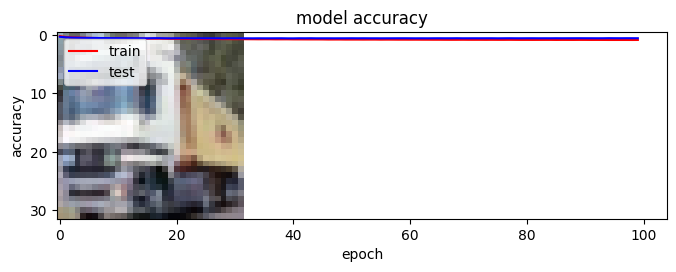

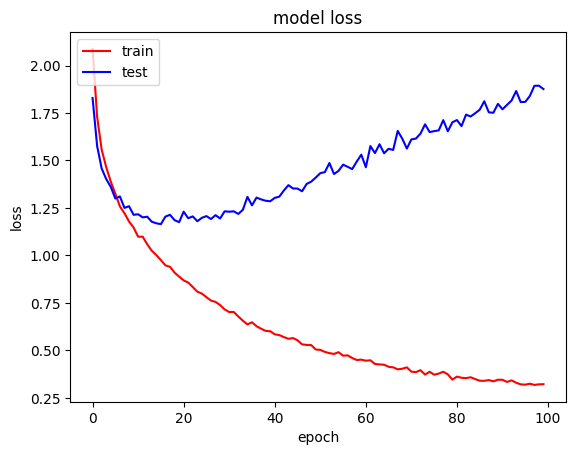

In [7]:
# Plot of the training history

# Accuray 
plt.plot(history.history['accuracy'],'r')
plt.plot(history.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history.history['loss'],'r')
plt.plot(history.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

## Image augmentation

In [8]:
# Neural network parameters
#-----------------------------------------------
#-----------------------------------------------
batch_size = 64 # 
epochs = 100 # 
#-----------------------------------------------
#-----------------------------------------------
num_classes = 10
img_rows, img_cols = 32, 32
input_shape = (img_rows, img_cols,3)

# Model
model = Sequential()
#-----------------------------------------------
#-----------------------------------------------
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu',input_shape=input_shape)) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
model.add(Conv2D(32, (3, 3), activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(MaxPooling2D(pool_size=(2, 2)))
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Flatten()) 
model.add(Dense(50, activation='relu')) 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dropout(0.1)) # Value between 0 and 1 
#-----------------------------------------------
#-----------------------------------------------
model.add(Dense(num_classes, activation='softmax'))


model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#### Image augmentation ####

from tensorflow.keras.preprocessing.image import ImageDataGenerator
# construct the training image generator for data augmentation
aug = ImageDataGenerator(rotation_range=20, zoom_range=0.15,
width_shift_range=0.2, height_shift_range=0.2, shear_range=0.15,
horizontal_flip=True, fill_mode="nearest")
 
# train the network
history_aug = model.fit(aug.flow(X_train, y_train, batch_size=batch_size),epochs=epochs,validation_data = (X_test,y_test))

Epoch 1/100


/opt/anaconda3/lib/python3.12/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


157/157 ━━━━━━━━━━━━━━━━━━━━ 4s 22ms/step - accuracy: 0.1488 - loss: 2.2182 - val_accuracy: 0.3345 - val_loss: 1.8833
Epoch 2/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.2776 - loss: 1.9135 - val_accuracy: 0.3660 - val_loss: 1.7451
Epoch 3/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.3193 - loss: 1.8257 - val_accuracy: 0.4203 - val_loss: 1.6447
Epoch 4/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3354 - loss: 1.7801 - val_accuracy: 0.4303 - val_loss: 1.5879
Epoch 5/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3612 - loss: 1.7254 - val_accuracy: 0.4518 - val_loss: 1.5063
Epoch 6/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 18ms/step - accuracy: 0.3807 - loss: 1.6703 - val_accuracy: 0.4507 - val_loss: 1.4975
Epoch 7/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3967 - loss: 1.6316 - val_accuracy: 0.4588 - val_loss: 1.4885
Epoch 8/100
157/157 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.3951 - loss: 1.6398 - val_accuracy

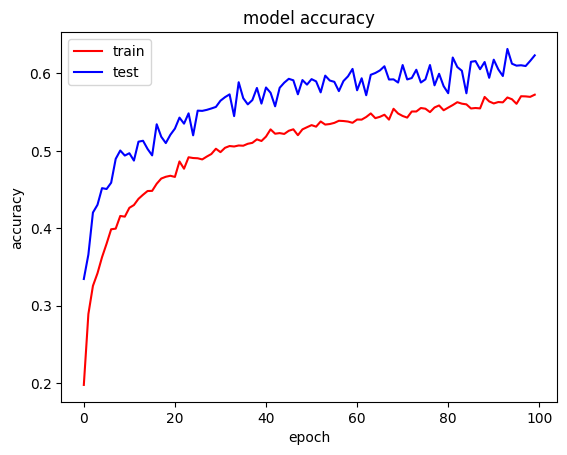

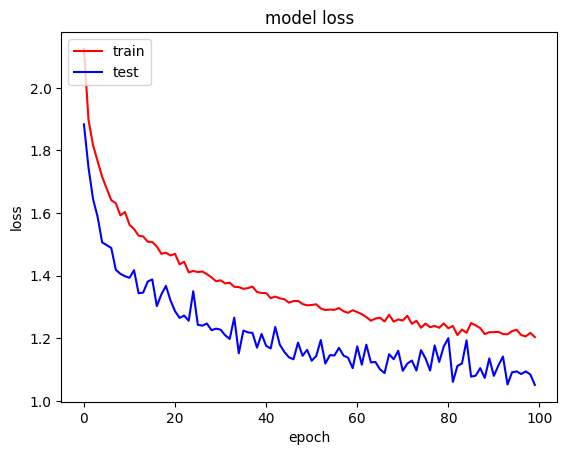

In [9]:
# Plot of the training history

# Accuray 
plt.plot(history_aug.history['accuracy'],'r')
plt.plot(history_aug.history['val_accuracy'],'b')
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# Loss 
plt.plot(history_aug.history['loss'],'r')
plt.plot(history_aug.history['val_loss'],'b')

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

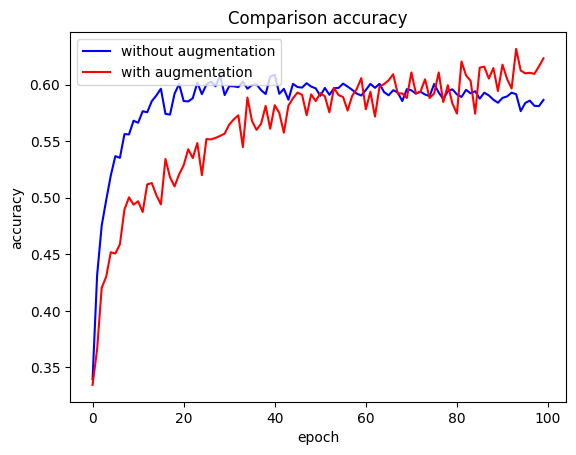

In [10]:
# Comparison CNNs with and without image augmentation

# Accuray 
plt.plot(history.history['val_accuracy'],'b')
plt.plot(history_aug.history['val_accuracy'],'r')
plt.title('Comparison accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['without augmentation', 'with augmentation'], loc='upper left')
plt.show()